In [181]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1,2,3,4,5'

In [182]:
import pandas as pd
df1 = pd.read_excel("./train_rev5.xlsx",index_col=0,parse_dates=[0])
df2 = pd.read_excel("./test_rev5.xlsx",index_col=0,parse_dates=[0])

In [183]:
#unique index 바꾸기

df1['country'] = df1['country'].map(df1['country'].value_counts())
#df1['description'] = df1['description'].map(df1['description'].value_counts())
df1['designation'] = df1['designation'].map(df1['designation'].value_counts())
df1['province'] = df1['province'].map(df1['province'].value_counts())
df1['region_1'] = df1['region_1'].map(df1['region_1'].value_counts())
df1['region_2'] = df1['region_2'].map(df1['region_2'].value_counts())
df1['taster_name'] = df1['taster_name'].map(df1['taster_name'].value_counts())
#df1['taster_twitter_handle'] = df1['taster_twitter_handle'].map(df1['taster_twitter_handle'].value_counts())
df1['title'] = df1['title'].map(df1['title'].value_counts())
df1['variety'] = df1['variety'].map(df1['variety'].value_counts())
df1['winery'] = df1['winery'].map(df1['winery'].value_counts())
df1['vintage'] = df1['vintage'].map(df1['vintage'].value_counts())
df1['continent'] = df1['continent'].map(df1['continent'].value_counts())
df1['description_len'] = df1['description'].astype(str).map(len)



df2['country'] = df2['country'].map(df2['country'].value_counts())
#df2['description'] = df2['description'].map(df2['description'].value_counts())
df2['designation'] = df2['designation'].map(df2['designation'].value_counts())
df2['province'] = df2['province'].map(df2['province'].value_counts())
df2['region_1'] = df2['region_1'].map(df2['region_1'].value_counts())
df2['region_2'] = df2['region_2'].map(df2['region_2'].value_counts())
df2['taster_name'] = df2['taster_name'].map(df2['taster_name'].value_counts())
#df2['taster_twitter_handle'] = df2['taster_twitter_handle'].map(df2['taster_twitter_handle'].value_counts())
df2['title'] = df2['title'].map(df2['title'].value_counts())
df2['variety'] = df2['variety'].map(df2['variety'].value_counts())
df2['winery'] = df2['winery'].map(df2['winery'].value_counts())
df2['vintage'] = df2['vintage'].map(df2['vintage'].value_counts())
df2['continent'] = df2['continent'].map(df2['continent'].value_counts())
df2['description_len'] = df2['description'].astype(str).map(len)

In [191]:
y = df1.points  
X = df1[['price','vintage','vintage_','price_modify','grade_germany', 'grade_italy','grade_spain','grade_france','grade_italy','grade_spain','grade_france','description_len','designation_len_modify','Rating_Avg','pre_points']]
X_test_set = df2[['price','vintage','vintage_','price_modify','grade_germany', 'grade_italy','grade_spain','grade_france','grade_italy','grade_spain','grade_france','description_len','designation_len_modify','Rating_Avg','pre_points']]

#X = df1[['country','price','province','region_1', 'region_2', 'taster_name', 'title','variety','winery','vintage','vintage_','taster_name_q2_modify','price_modify','province_modify','continent',  'grade_germany', 'grade_italy','grade_spain','grade_france','grade_italy','grade_spain','grade_france','description_len','designation','Rating_Avg','pre_points']]
#X_test_set = df2[['country','price', 'province','region_1', 'region_2', 'taster_name', 'title','variety','winery','vintage','vintage_','taster_name_q2_modify','price_modify','province_modify','continent',  'grade_germany', 'grade_italy','grade_spain','grade_france','grade_italy','grade_spain','grade_france','description_len','designation','Rating_Avg','pre_points']]


In [192]:
#normalized

import pandas as pd
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)


In [193]:
X = X.fillna((0))

In [194]:
import numpy as np
import random
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.svm import SVR 
from sklearn.ensemble import AdaBoostRegressor as ADA
from sklearn.ensemble import BaggingRegressor as BAG
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.linear_model import RANSACRegressor as RAN
from sklearn.linear_model import PassiveAggressiveRegressor as PAR
from sklearn.linear_model import SGDRegressor as SGD
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.datasets import make_regression
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping 

%matplotlib inline
plt.style.use('seaborn-white')

In [188]:
class ensemble_search:
    def __init__(self, X_train, y_train, X_test, y_test,
                 size_pop=20, epochs=5, verbose=True):
        
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.size_pop = size_pop
        self.epochs = epochs
        self.fitness_array_ = np.array([])
        self.best_of_all_ = None
        self.verbose_ = verbose

    def gen_population(self):
        
        population = [[]]*self.size_pop
        
        for i in range(self.size_pop):
            
            qt_regressor = np.random.randint(2,9)
            lista_LR = ['LR',LR(), {}]
            
            lista_RFR = ['RFR',RFR(), 
                         {'n_estimators':np.random.randint(1,100),
                          'max_depth':np.random.randint(1,20),
                          'min_samples_split':np.random.randint(2,5),      
                          'min_samples_leaf':np.random.randint(2,10),   
                          'min_weight_fraction_leaf':np.random.rand(1)[0]/2}]
            
            lista_SVR = ['SVR',SVR(),
                         {'kernel':random.choice(['linear','rbf','poly','sigmoid']),     
                          'epsilon':np.random.rand(1)[0]/4,
                          'C':random.choice([1,10,100,1000]),'gamma':'auto'}]
            
            lista_ADA = ['ADA',ADA(), 
                         {'n_estimators':np.random.randint(1,50)}]
            
            lista_BAG = ['BAG',BAG(), 
                         {'n_estimators':np.random.randint(1,50),'max_samples':np.random.randint(1,20)}]
            
            lista_GBR = ['GBR',GBR(), 
                         {'n_estimators':np.random.randint(1,100),'max_depth':np.random.randint(1,20),        
                          'min_samples_split':np.random.randint(2,5),      
                          'min_samples_leaf':np.random.randint(2,10),     
                          'min_weight_fraction_leaf':np.random.rand(1)[0]/2}]
            
            lista_RAN = ['RAN',RAN(), {}]
            
            lista_PAR = ['PAR',PAR(), 
                         {'C': np.random.randint(1,10), 'early_stopping':True,        
                          'n_iter_no_change':np.random.randint(1,10)}]
            
            lista_SGD = ['SGD',SGD(), {}]
            
            lista_regressors = [lista_LR,lista_RFR,lista_SVR,lista_ADA,lista_BAG,
                                lista_GBR,lista_RAN,lista_PAR,lista_SGD]
            
            random.shuffle(lista_regressors)
            
            lista_regressors = lista_regressors[0:qt_regressor]
            
            for j in range(len(lista_regressors)):
                lista_regressors[j][1] = lista_regressors[j][1].set_params(**lista_regressors[j][2])

            population[i] = [qt_regressor, lista_regressors, 'voting_regressor', np.inf]
            
        return population

    def set_fitness(self, population):
        for i in range(len(population)):
            
            lista_tuplas_VR = []
            nomes = []
            for indv in population[i][1]:
                
                while indv[0] in nomes: #adionar X se o nome já estiver dentro
                    indv[0] = indv[0]+'X'
                nomes.append(indv[0])
                
                lista_tuplas_VR.append((indv[0],indv[1])) #aqui vai pegando cada regressor do indivíduo (lista de regressores),
                                                          #que é formado pelo nome do regressor e o objeto.
                
            Voting_regressor = VotingRegressor(lista_tuplas_VR)
            Voting_regressor.fit(self.X_train, self.y_train)
            
            mae_vr = mae(Voting_regressor.predict(self.X_test), self.y_test)
            population[i][-1] = mae_vr
            population[i][-2] = Voting_regressor
            
        return population
    
    def next_population(self, population):
        
        for i in range(1, int(len(population)/2)):
            qt_regs_pai1 = population[i][0]
            qt_regs_pai2 = population[2*i][0]
            
            #aqui mistura os regressores
            if qt_regs_pai1<=qt_regs_pai2:    
                population[i][1][:int(qt_regs_pai1/2)] = population[2*i][1][:int(qt_regs_pai1/2)]
            else:
                population[i][1][:int(qt_regs_pai2/2)] = population[2*i][1][:int(qt_regs_pai2/2)]
                
            #modificar nomes dos regressores se houver repetido
            nomes = []
            for reg in population[i][1]:
                while reg[0] in nomes: #adionar X se o nome já estiver dentro
                    reg[0] = reg[0]+'X'
                nomes.append(reg[0])
        
        return population
    
    def early_stop(self):
        array = self.fitness_array_
        to_break=False
        if len(array) > 4:
            array_diff1_1 = array[1:] - array[:-1]
            array_diff2 = array_diff1_1[1:] - array_diff1_1[:-1]
            
            if (self.verbose_):
                print('second derivative: ', array_diff2[-2:].mean()) 
                print('first derivative: ', abs(array_diff1_1[-2:].mean()))
                print('featness: ', array[-1])
                
            if (array_diff2[-2:].mean()) > 0 and (abs(array_diff1_1[-3:].mean()) <1e-3):
                to_break = True
        
        return to_break

    def search_best(self):
        population = self.gen_population()
        population = self.set_fitness(population)
        population.sort(key = lambda x: x[-1])  
        self.fitness_array_ = np.append(self.fitness_array_, population[0][-1])
        self.best_of_all_ = population[0][-2]
        
        for i in tqdm(range(self.epochs)):
            population = self.next_population(population)
            population = self.set_fitness(population)
            population.sort(key = lambda x: x[-1])
            
            #pegar o melhor de todas as épocas
            
            if population[0][-1] < min(self.fitness_array_):
                self.best_of_all_ = population[0][-2]
            
            #adicionar ao array de fitness o atual
            self.fitness_array_ = np.append(self.fitness_array_, population[0][-1])

            if self.early_stop():
                break
            
        return self


n_samples = 1000
n_outliers = 50
X, y, coef = make_regression(n_samples=n_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Ensearch = ensemble_search(X_train, y_train, X_test, y_test, size_pop=10, epochs=50).search_best()
print(np.sqrt(mae(Ensearch.best_of_all_.predict(X_test), y_test)))

  8%|▊         | 4/50 [00:06<01:12,  1.57s/it]

second derivative:  -0.30454951366809446
first derivative:  0.012111457339826437
featness:  8.255222223997185


 10%|█         | 5/50 [00:07<01:09,  1.55s/it]

second derivative:  -0.6005922402790791
first derivative:  0.5884807829392527
featness:  8.22356155601358


 12%|█▏        | 6/50 [00:09<01:07,  1.53s/it]

second derivative:  0.7505963035163115
first derivative:  0.1621155205770588
featness:  8.579453265151303


 14%|█▍        | 7/50 [00:10<01:06,  1.54s/it]

second derivative:  0.3659109164464711
first derivative:  0.5280264370235299
featness:  9.27961443006064


 16%|█▌        | 8/50 [00:12<01:07,  1.60s/it]

second derivative:  -0.5000569529342087
first derivative:  0.027969484089321206
featness:  8.635392233329945


 18%|█▊        | 9/50 [00:13<01:04,  1.56s/it]

second derivative:  -0.19338119468000148
first derivative:  0.16541171059068027
featness:  8.94879100887928


 20%|██        | 10/50 [00:15<01:00,  1.51s/it]

second derivative:  -0.04993901736907791
first derivative:  0.21535072795975818
featness:  8.204690777410429


 22%|██▏       | 11/50 [00:16<00:57,  1.47s/it]

second derivative:  0.204923418202414
first derivative:  0.010427309757344183
featness:  8.927936389364591


 24%|██▍       | 12/50 [00:18<00:55,  1.45s/it]

second derivative:  0.1669598663890497
first derivative:  0.1565325566317055
featness:  8.51775589067384


 26%|██▌       | 13/50 [00:19<00:53,  1.44s/it]

second derivative:  -0.43344393247177315
first derivative:  0.27691137584006764
featness:  8.374113637684456


 28%|██▊       | 14/50 [00:20<00:51,  1.42s/it]

second derivative:  0.21729989284650308
first derivative:  0.05961148299356456
featness:  8.39853292468671


 30%|███       | 15/50 [00:22<00:48,  1.40s/it]

second derivative:  0.17363919674924677
first derivative:  0.11402771375568221
featness:  8.60216906519582


 32%|███▏      | 16/50 [00:23<00:46,  1.37s/it]

second derivative:  0.49405720384226104
first derivative:  0.6080849175979433
featness:  9.614702759882597


 34%|███▍      | 17/50 [00:24<00:45,  1.37s/it]

second derivative:  -0.34958300100130657
first derivative:  0.2585019165966367
featness:  9.119172898389094


 36%|███▌      | 18/50 [00:26<00:43,  1.36s/it]

second derivative:  -0.05042750578602462
first derivative:  0.20807441081061206
featness:  10.030851581503821


 38%|███▊      | 19/50 [00:27<00:41,  1.35s/it]

second derivative:  -0.13866315903870863
first derivative:  0.06941125177190344
featness:  9.2579954019329


 40%|████      | 20/50 [00:29<00:41,  1.38s/it]

second derivative:  -1.0262234749392771
first derivative:  0.9568122231673737
featness:  8.117227135169074


 42%|████▏     | 21/50 [00:30<00:41,  1.45s/it]

second derivative:  0.7475657122968036
first derivative:  0.2092465108705701
featness:  8.83950238019176


 44%|████▍     | 22/50 [00:32<00:42,  1.53s/it]

second derivative:  0.8078226995446602
first derivative:  0.5985761886740901
featness:  9.314379512517254


 46%|████▌     | 23/50 [00:33<00:40,  1.50s/it]

second derivative:  -0.5493573155693703
first derivative:  0.04921887310471984
featness:  8.9379401264012


 48%|████▊     | 24/50 [00:35<00:38,  1.49s/it]

second derivative:  -0.08747102409501739
first derivative:  0.03825215099029755
featness:  9.237875210536659


 50%|█████     | 25/50 [00:36<00:38,  1.54s/it]

second derivative:  -0.021336568986892956
first derivative:  0.05958871997719051
featness:  8.818762686446819


 52%|█████▏    | 26/50 [00:38<00:35,  1.49s/it]

second derivative:  -0.14724503670608247
first derivative:  0.20683375668327297
featness:  8.824207697170113


 54%|█████▍    | 27/50 [00:39<00:33,  1.46s/it]

second derivative:  0.3711907703353967
first derivative:  0.16435701365212374
featness:  9.147476713751066


 56%|█████▌    | 28/50 [00:41<00:32,  1.47s/it]

second derivative:  -0.37520788627434776
first derivative:  0.21085087262222402
featness:  8.402505951925665


 58%|█████▊    | 29/50 [00:42<00:30,  1.47s/it]

second derivative:  -0.09403047503699558
first derivative:  0.3048813476592196
featness:  8.537714018432627


 60%|██████    | 30/50 [00:43<00:28,  1.43s/it]

second derivative:  0.3378856457409194
first derivative:  0.0330042980816998
featness:  8.468514548089065


 62%|██████▏   | 31/50 [00:45<00:26,  1.40s/it]

second derivative:  0.252044099524956
first derivative:  0.2850483976066558
featness:  9.107810813645939


 64%|██████▍   | 32/50 [00:46<00:24,  1.39s/it]

second derivative:  0.05343790380900515
first derivative:  0.33848630141566094
featness:  9.145487150920387


 66%|██████▌   | 33/50 [00:48<00:23,  1.39s/it]

second derivative:  -0.6119388059505297
first derivative:  0.2734525045348688
featness:  8.560905804576201


 68%|██████▊   | 34/50 [00:49<00:22,  1.40s/it]

second derivative:  -0.0032390381910119004
first derivative:  0.2766915427258807
featness:  8.592104065468625


 70%|███████   | 35/50 [00:50<00:20,  1.38s/it]

second derivative:  0.28530940420614215
first derivative:  0.008617861480261446
featness:  8.578141527536724


 72%|███████▏  | 36/50 [00:52<00:19,  1.37s/it]

second derivative:  0.01812749720765172
first derivative:  0.026745358687913168
featness:  8.645594782844451


 74%|███████▍  | 37/50 [00:53<00:17,  1.36s/it]

second derivative:  0.028177235098574727
first derivative:  0.054922593786487894
featness:  8.6879867151097


 76%|███████▌  | 38/50 [00:54<00:16,  1.36s/it]

second derivative:  -0.1521097176329933
first derivative:  0.09718712384650541
featness:  8.45122053515144


 78%|███████▊  | 39/50 [00:56<00:14,  1.35s/it]

second derivative:  0.47727077263710793
first derivative:  0.3800836487906025
featness:  9.448154012690905


 80%|████████  | 40/50 [00:57<00:14,  1.40s/it]

second derivative:  0.10332340882404978
first derivative:  0.4834070576146523
featness:  9.418034650380745


 82%|████████▏ | 41/50 [00:59<00:12,  1.42s/it]

second derivative:  -1.0927062136752124
first derivative:  0.6092991560605601
featness:  8.229555700569785


 84%|████████▍ | 42/50 [01:00<00:11,  1.39s/it]

second derivative:  0.21129020713935098
first derivative:  0.3980089489212091
featness:  8.622016752538327


 86%|████████▌ | 43/50 [01:01<00:09,  1.41s/it]

second derivative:  0.44201548649836475
first derivative:  0.04400653757715567
featness:  8.317568775724096


 88%|████████▊ | 44/50 [01:03<00:08,  1.41s/it]

second derivative:  0.5230356950621324
first derivative:  0.5670422326392881
featness:  9.756101217816903


 90%|█████████ | 45/50 [01:04<00:07,  1.44s/it]

second derivative:  -0.23730896066630525
first derivative:  0.32973327197298286
featness:  8.977035319670062


 92%|█████████▏| 46/50 [01:06<00:05,  1.47s/it]

second derivative:  -0.46335386318969896
first derivative:  0.1336205912167161
featness:  9.488860035383471


 94%|█████████▍| 47/50 [01:07<00:04,  1.44s/it]

second derivative:  -0.0025130174522240978
first derivative:  0.1361336086689402
featness:  8.704768102332181


 96%|█████████▌| 48/50 [01:09<00:02,  1.47s/it]

second derivative:  0.046751664599439025
first derivative:  0.08938194406950117
featness:  9.310096147244469


 98%|█████████▊| 49/50 [01:10<00:01,  1.48s/it]

second derivative:  0.26440503684901273
first derivative:  0.17502309277951156
featness:  9.054814287891205


100%|██████████| 50/50 [01:12<00:00,  1.45s/it]

second derivative:  -0.7543798251424514
first derivative:  0.5793567323629398
featness:  8.151382682518589
2.849074785815401


In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [196]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions))


1.4761959237016653e-14

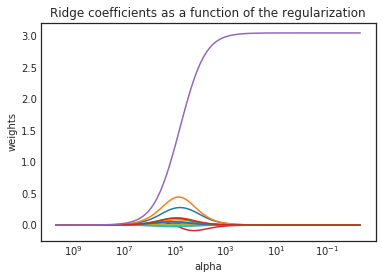

In [197]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X), y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

In [198]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [199]:
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
sqrt(mean_squared_error(y_test, ridge.predict(scale(X_test))))

0.016213575314855667

In [200]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10, random_state=1)
rfr.fit(scale(X_train), y_train)
mean_squared_error(y_test, rfr.predict(scale(X_test)))**0.5

0.0

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=10, n_estimators=250, n_jobs=-1, subsample=.7)
xgb.fit(scale(X_train), y_train)

sqrt(mean_squared_error(y_test, xgb.predict(scale(X_test))))

[23:43:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [201]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(loss= 'ls',max_depth=5, learning_rate=0.01)
GBR.fit(scale(X_train), y_train)

sqrt(mean_squared_error(y_test, GBR.predict(scale(X_test))))

1.1143414524145385

In [202]:
import pandas as pd
from sklearn import preprocessing

x1 = X_test_set.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled1 = min_max_scaler.fit_transform(x1)
X_test_set1 = pd.DataFrame(x_scaled1)

In [203]:
#X_test_set1 = X_test_set1.fillna(X_test_set1.median())

In [204]:
X_test_set1 = X_test_set1.fillna((0))

In [205]:
X_test_set1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.027609,1.000000,0.808989,0.111111,0.0,0.0,0.0,0.75,0.0,0.0,0.75,0.277198,0.370787,0.663793,0.661001
1,0.006675,1.000000,0.808989,0.111111,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.259314,0.000000,0.000000,0.426165
2,0.000000,0.232471,0.842697,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.636364,0.393258,0.000000,0.546345
3,0.032160,0.121035,0.707865,0.222222,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.521610,0.258427,0.000000,0.523927
4,0.007888,0.756678,0.775281,0.111111,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.269747,0.382022,0.896552,0.263579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38986,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.301043,0.134831,0.000000,0.402191
38987,0.004854,0.769616,0.786517,0.111111,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.248882,0.157303,0.000000,0.255095
38988,0.007585,0.627713,0.764045,0.111111,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.245902,0.078652,0.000000,0.076409
38989,0.006068,0.756678,0.775281,0.111111,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.178838,0.247191,0.836207,0.281195


In [206]:
test_set = df2
#test set에 col 추가
prediction = lm.predict(X_test_set1)
test_set['points'] = prediction

In [207]:
test_set.points

id
5         93.220016
14        88.523299
15        90.926907
18        90.478537
21        85.271580
            ...    
129962    88.043828
129964    85.101895
129966    81.528181
129969    85.623906
129970    86.419019
Name: points, Length: 38991, dtype: float64

In [208]:
sqrt(mean_squared_error(test_set.pre_points,test_set.points ))

0.31546120883734563

In [209]:
test_set.to_excel("./result.xlsx")

In [117]:
df3 = pd.read_excel("./cc.xlsx",index_col=0,parse_dates=[0])

In [119]:
df4 = df3.dropna(subset = ['points1'])

In [121]:
df4 = df4.dropna(subset = ['pre_points'])

In [122]:
sqrt(mean_squared_error(df3.pre_points,df3.points1))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [214]:
import pandas as pd
df100 = pd.read_excel("./result411.xlsx",index_col=0,parse_dates=[0])

In [215]:
sqrt(mean_squared_error(df100.points,df100.points1))

1.6323336576515581